### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_values = application_df.APPLICATION_TYPE.value_counts()

app_values

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

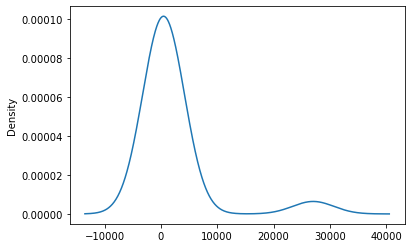

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_values.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
# Determine which values to replace
replace_application = list(app_values[app_values < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [8]:
# Look at CLASSIFICATION value counts for binning
class_values = application_df.CLASSIFICATION.value_counts()

class_values

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1283        1
C4200        1
C1245        1
C4120        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

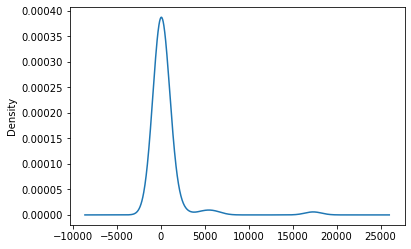

In [9]:
# Visualize the value counts of CLASSIFICATION
class_values.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_values[class_values < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [12]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
application_df.IS_SUCCESSFUL.value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=['IS_SUCCESSFUL', 'STATUS', 'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2 + 3: Compile, Train, Optimize and Evaluate the Model

# Model 1

In [18]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                492       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

# Export our model to HDF5 file
nn.save("trained_alphabet_model1.h5")

Epoch 1/50
804/804 [==============================] - 1s 835us/step - loss: 0.6027 - accuracy: 0.6962

Epoch 00001: saving model to checkpoints\weights.01.hdf5
Epoch 2/50
804/804 [==============================] - 1s 811us/step - loss: 0.5694 - accuracy: 0.7239

Epoch 00002: saving model to checkpoints\weights.02.hdf5
Epoch 3/50
804/804 [==============================] - 1s 827us/step - loss: 0.5575 - accuracy: 0.7264

Epoch 00003: saving model to checkpoints\weights.03.hdf5
Epoch 4/50
804/804 [==============================] - 1s 818us/step - loss: 0.5551 - accuracy: 0.7279

Epoch 00004: saving model to checkpoints\weights.04.hdf5
Epoch 5/50
804/804 [==============================] - 1s 817us/step - loss: 0.5534 - accuracy: 0.7281

Epoch 00005: saving model to checkpoints\weights.05.hdf5
Epoch 6/50
804/804 [==============================] - 1s 814us/step - loss: 0.5522 - accuracy: 0.7296

Epoch 00006: saving model to checkpoints\weights.06.hdf5
Epoch 7/50
804/804 [====================

<AxesSubplot:>

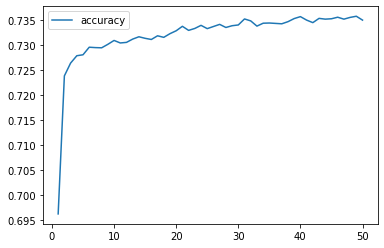

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Model 1 Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5528 - accuracy: 0.7277
Model 1 Loss: 0.5527997612953186, Accuracy: 0.7276967763900757


# Model 2

In [22]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                984       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Export our model to HDF5 file
nn.save("trained_alphabet_model2.h5")

Epoch 1/100
804/804 [==============================] - 1s 861us/step - loss: 0.5789 - accuracy: 0.7149

Epoch 00001: saving model to checkpoints\weights.01.hdf5
Epoch 2/100
804/804 [==============================] - 1s 867us/step - loss: 0.5572 - accuracy: 0.7308

Epoch 00002: saving model to checkpoints\weights.02.hdf5
Epoch 3/100
804/804 [==============================] - 1s 836us/step - loss: 0.5549 - accuracy: 0.7311

Epoch 00003: saving model to checkpoints\weights.03.hdf5
Epoch 4/100
804/804 [==============================] - 1s 863us/step - loss: 0.5527 - accuracy: 0.7315

Epoch 00004: saving model to checkpoints\weights.04.hdf5
Epoch 5/100
804/804 [==============================] - 1s 832us/step - loss: 0.5513 - accuracy: 0.7320

Epoch 00005: saving model to checkpoints\weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 1s 857us/step - loss: 0.5502 - accuracy: 0.7325

Epoch 00006: saving model to checkpoints\weights.06.hdf5
Epoch 7/100
804/804 [=============

804/804 [==============================] - 1s 866us/step - loss: 0.5410 - accuracy: 0.7370

Epoch 00051: saving model to checkpoints\weights.51.hdf5
Epoch 52/100
804/804 [==============================] - 1s 828us/step - loss: 0.5409 - accuracy: 0.7370

Epoch 00052: saving model to checkpoints\weights.52.hdf5
Epoch 53/100
804/804 [==============================] - 1s 840us/step - loss: 0.5413 - accuracy: 0.7372

Epoch 00053: saving model to checkpoints\weights.53.hdf5
Epoch 54/100
804/804 [==============================] - 1s 888us/step - loss: 0.5406 - accuracy: 0.73730s - loss: 0.5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
Epoch 55/100
804/804 [==============================] - 1s 858us/step - loss: 0.5407 - accuracy: 0.7371

Epoch 00055: saving model to checkpoints\weights.55.hdf5
Epoch 56/100
804/804 [==============================] - 1s 858us/step - loss: 0.5409 - accuracy: 0.7370

Epoch 00056: saving model to checkpoints\weights.56.hdf5
Epoch 57/100
804/804 [=====

<AxesSubplot:>

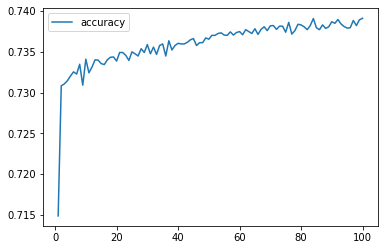

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Model 2 Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5509 - accuracy: 0.7277
Model 2 Loss: 0.5508960485458374, Accuracy: 0.7276967763900757


# Model 3

In [26]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 24)                984       
_________________________________________________________________
dense_7 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 1,369
Trainable params: 1,369
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Export our model to HDF5 file
nn.save("trained_alphabet_model3.h5")

Epoch 1/100
804/804 [==============================] - 1s 925us/step - loss: 0.6010 - accuracy: 0.6976

Epoch 00001: saving model to checkpoints\weights.01.hdf5
Epoch 2/100
804/804 [==============================] - 1s 944us/step - loss: 0.5597 - accuracy: 0.7289

Epoch 00002: saving model to checkpoints\weights.02.hdf5
Epoch 3/100
804/804 [==============================] - 1s 929us/step - loss: 0.5538 - accuracy: 0.7317

Epoch 00003: saving model to checkpoints\weights.03.hdf5
Epoch 4/100
804/804 [==============================] - 1s 919us/step - loss: 0.5518 - accuracy: 0.7317

Epoch 00004: saving model to checkpoints\weights.04.hdf5
Epoch 5/100
804/804 [==============================] - 1s 955us/step - loss: 0.5502 - accuracy: 0.7324

Epoch 00005: saving model to checkpoints\weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 1s 940us/step - loss: 0.5492 - accuracy: 0.7315

Epoch 00006: saving model to checkpoints\weights.06.hdf5
Epoch 7/100
804/804 [=============

804/804 [==============================] - 1s 842us/step - loss: 0.5404 - accuracy: 0.7368

Epoch 00051: saving model to checkpoints\weights.51.hdf5
Epoch 52/100
804/804 [==============================] - 1s 900us/step - loss: 0.5400 - accuracy: 0.7378

Epoch 00052: saving model to checkpoints\weights.52.hdf5
Epoch 53/100
804/804 [==============================] - 1s 930us/step - loss: 0.5400 - accuracy: 0.7381

Epoch 00053: saving model to checkpoints\weights.53.hdf5
Epoch 54/100
804/804 [==============================] - 1s 945us/step - loss: 0.5396 - accuracy: 0.7375

Epoch 00054: saving model to checkpoints\weights.54.hdf5
Epoch 55/100
804/804 [==============================] - 1s 897us/step - loss: 0.5403 - accuracy: 0.7378

Epoch 00055: saving model to checkpoints\weights.55.hdf5
Epoch 56/100
804/804 [==============================] - 1s 850us/step - loss: 0.5396 - accuracy: 0.7379

Epoch 00056: saving model to checkpoints\weights.56.hdf5
Epoch 57/100
804/804 [===================

<AxesSubplot:>

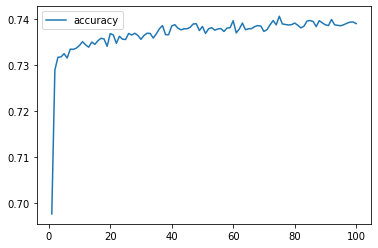

In [28]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Model 3 Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 0s - loss: 0.5545 - accuracy: 0.7266
Model 3 Loss: 0.5545368790626526, Accuracy: 0.7266472578048706


# Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=256)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.713
